### NER and knowledge graph

[nltk_data] Downloading package punkt to C:\Users\Gurram Bhavya
[nltk_data]     Reddy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Gurram Bhavya
[nltk_data]     Reddy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Top 10 words:
feel: 341
prozac: 340
taking: 320
side: 304
effects: 270
depression: 227
like: 226
weeks: 224
take: 216
life: 214

Named Entities:
MD - GPE
about 300 - CARDINAL
2 - CARDINAL
since 2004 - DATE
this week - DATE
about a month - DATE
four - CARDINAL
3 weeks - DATE
Metformin - PERSON
several years - DATE
A1C - ORG
10 years ago - DATE
first - ORDINAL
2 - CARDINAL
one 500 - QUANTITY
3 months - DATE
500MG - PRODUCT
200 - CARDINAL
125 - CARDINAL
Gas - PRODUCT
one - CARDINAL
2 hours - TIME
First - ORDINAL
Med - PERSON
daily - DATE
200 - CARDINAL
125 - CARDINAL
GI - ORG
the days - DATE
GI - ORG
500mg twice - QUANTITY
Metformin - PERSON
Iâ??ve - ORG
Metformin - PERSON
almost 21 years - DATE
A1C - ORG
Metformin - PERSON
Iâ??ve - ORG
Metformin - PERSON
almost 21 years - DATE
A1C - ORG
ER - ORG
One day - DATE
the 3rd week - DATE
Metformin - PERSON
Brain - ORG
Metformin - PERSON
three weeks - DATE
today - DATE
4 years - DATE
Papuations - GPE
week 3 - DATE
Metformin - PERSON
Three months 

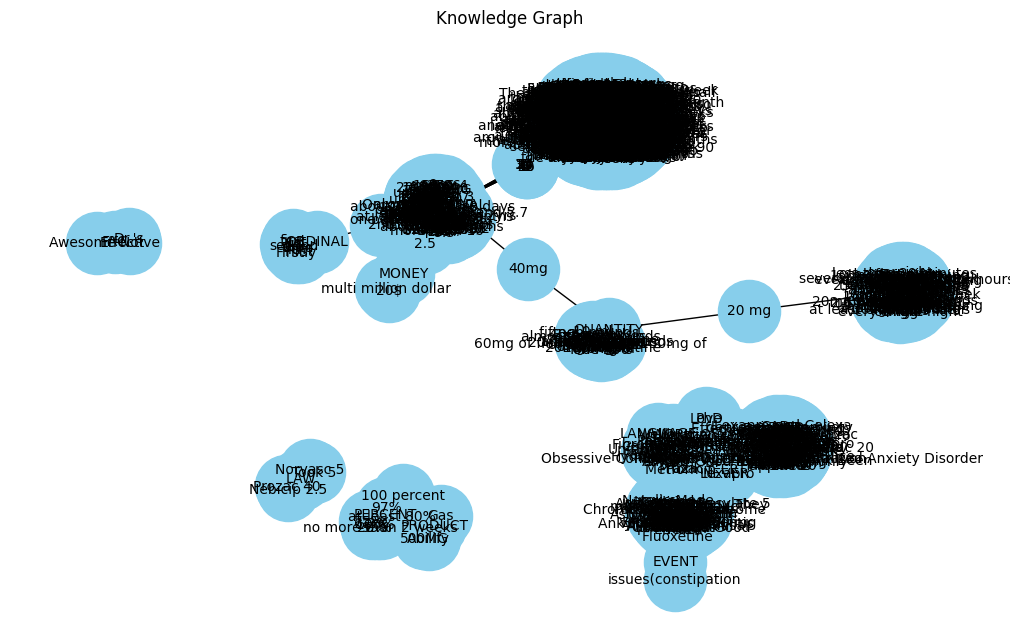

In [1]:

import pandas as pd
import nltk
import spacy
import collections
import networkx as nx
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
# Load the CSV file
csv_file = r"C:\Users\Gurram Bhavya Reddy\Downloads\Conventional_medicine_final.xlsx"
df = pd.read_excel(csv_file)
# Combine all comments into a single string
text_data = ' '.join(df['Commend'].astype(str).tolist()) 

# Step 1: Eliminate stop words and get word counts
stop_words = set(stopwords.words('english'))
words = word_tokenize(text_data.lower()) # Tokenize and lower case
filtered_words = [word for word in words if word.isalpha() and word
not in stop_words]
# Count the top 10 words
word_counts = collections.Counter(filtered_words)
top_10_words = word_counts.most_common(10)
print("Top 10 words:")
for word, count in top_10_words:
 print(f"{word}: {count}")
# Step 2: Named Entity Recognition (NER)
nlp = spacy.load("en_core_web_sm")
doc = nlp(text_data)
print("\nNamed Entities:")
for ent in doc.ents:
 print(f"{ent.text} - {ent.label_}")
# Step 3: Derive Knowledge Graph
edges = []
for ent in doc.ents:
 edges.append((ent.text, ent.label_))
# Create a graph from the edges
graph = nx.Graph()
graph.add_edges_from(edges)
# Step 4: Draw the knowledge graph
plt.figure(figsize=(10, 6))
nx.draw(graph, with_labels=True, node_color='skyblue', node_size=2000,
font_size=10, font_color='black')
plt.title('Knowledge Graph')
plt.show()


### Wordcloud

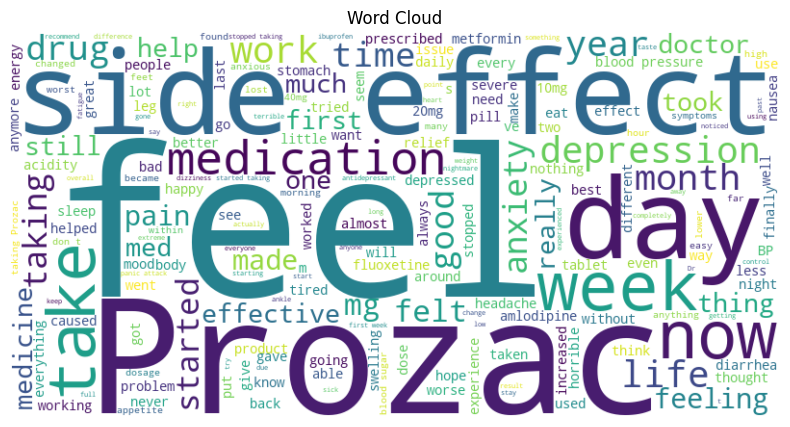

In [3]:

from wordcloud import WordCloud
# Generate a word cloud
wordcloud = WordCloud(width=800, height=400,
background_color='white').generate(text_data)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()


### N-gram analysis

In [4]:

from nltk import ngrams
# Generate bigrams
bigrams = ngrams(filtered_words, 2)
bigram_counts = collections.Counter(bigrams)
top_10_bigrams = bigram_counts.most_common(10)
print("\nTop 10 Bigrams:")
for bigram, count in top_10_bigrams:
 print(f"{' '.join(bigram)}: {count}")



Top 10 Bigrams:
side effects: 247
blood pressure: 88
feel like: 70
side effect: 39
taking prozac: 37
started taking: 34
stopped taking: 33
felt like: 31
depression anxiety: 31
blood sugar: 30


### TF-IDF vectorization

In [5]:

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(df['Commend'])
# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(),
columns=vectorizer.get_feature_names_out())
print("\nTF-IDF Matrix:")
print(tfidf_df.head())


TF-IDF Matrix:
    00  000   09  0ise  0ly   10  100  1000  10000  1000mg  ...  zaps  zero  \
0  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   0.0   0.0   
1  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   0.0   0.0   
2  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   0.0   0.0   
3  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   0.0   0.0   
4  0.0  0.0  0.0   0.0  0.0  0.0  0.0   0.0    0.0     0.0  ...   0.0   0.0   

   zinc  zipping  zoloft  zombie  zombielike  zoning  zonk  zonked  
0   0.0      0.0     0.0     0.0         0.0     0.0   0.0     0.0  
1   0.0      0.0     0.0     0.0         0.0     0.0   0.0     0.0  
2   0.0      0.0     0.0     0.0         0.0     0.0   0.0     0.0  
3   0.0      0.0     0.0     0.0         0.0     0.0   0.0     0.0  
4   0.0      0.0     0.0     0.0         0.0     0.0   0.0     0.0  

[5 rows x 3911 columns]
